### Import Required Libraries and Set Up Environment Variables

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

Most Streamed Spotify Songs 2023
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

* **track_name** : *Name of the song*
* **artist(s)_name** : *Name of the artist(s) of the song*
* **artist_count** : *Number of artists contributing to the song*
* **released_year** : *Year when the song was released*
* **released_month** : *Month when the song was released*
* **released_day** : *Day of the month when the song was released*
* **in_spotify_playlists** : *Number of Spotify playlists the song is included in*
* **in_spotify_charts** : *Presence and rank of the song on Spotify charts*
* **streams** : *Total number of streams on Spotify*
* **in_apple_playlists** : *Number of Apple Music playlists the song is included in*
* **in_apple_charts** : *Presence and rank of the song on Apple Music charts*
* **in_deezer_playlists** : *Number of Deezer playlists the song is included in*
* **in_deezer_charts** : *Presence and rank of the song on Deezer charts*
* **in_shazam_charts** : *Presence and rank of the song on Shazam charts*
* **bpm** : *Beats per minute, a measure of song tempo*
* **key** : *Key of the song*
* **mode** : *Mode of the song (major or minor)*
* **danceability_%** : *Percentage indicating how suitable the song is for dancing*
* **valence_%** : *Positivity of the song's musical content*
* **energy_%** : *Perceived energy level of the song*
* **acousticness_%** : *Amount of acoustic sound in the song*
* **instrumentalness_%** : *Amount of instrumental content in the song*
* **liveness_%** : *Presence of live performance elements*
* **speechiness_%** : *Amount of spoken words in the song*

In [58]:
# Import CSV, convert three data columns as a single dateTime object.
csv_path = 'Resources/spotify-2023-data.csv'

# note: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated.
# Combine the desired columns with pd.to_datetime (see above frame)
df = pd.read_csv(csv_path, encoding='ISO-8859-1', parse_dates = { 'release_date' : ['released_year', 'released_month', 'released_day']})

display(df.head())
display(df.info())

,release_date,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023-07-14,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,2023-03-23,LALA,Myke Towers,1,1474,48,133716286,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,2023-06-30,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,2019-08-23,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,2023-05-18,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          953 non-null    datetime64[ns]
 1   track_name            953 non-null    object        
 2   artist(s)_name        953 non-null    object        
 3   artist_count          953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    object        
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    object        
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      903 non-null    object        
 12  bpm                   953 non-null    int64         
 13  key                 

None

If there are mixed fields/types in a single column, read_csv will read them
as objects.  In the next block, we need to clean this data and make them uniform types:

Convert to numeric / int64:
streams               953 non-null    object 
in_deezer_playlists   953 non-null    object 
in_shazam_charts      903 non-null    object   

Convert to string:   
track_name            953 non-null    object        
artist(s)_name        953 non-null    object  
key                   858 non-null    object        
mode                  953 non-null    object 

In [69]:
#######################################
# Convert three columns of objects to numeric:
# errors='coerce' argument will replace all non-numeric values with NaN.)
#######################################
df_clean = df.copy()

cols = ['streams','in_deezer_playlists','in_shazam_charts']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')
# df_clean[cols] = pd.to_numeric(df_clean[cols],errors='coerce')

###################################
# Convert four columns of objects to strings:  
###################################
str_cols = ['artist(s)_name','key','mode']  # 'track_name',
df_clean[str_cols] = df_clean[str_cols].astype('string')

display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          953 non-null    datetime64[ns]
 1   track_name            953 non-null    object        
 2   artist(s)_name        953 non-null    string        
 3   artist_count          953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               952 non-null    float64       
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   874 non-null    float64       
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      896 non-null    float64       
 12  bpm                   953 non-null    int64         
 13  key                 

None

In [70]:
# Reformat track_name to object:

# top_stm_tracks_release_yr_df['track_name'] = top_stm_tracks_release_yr_df['track_name'].astype('object')



In [71]:
#################################################
# Reformat Streams Column to Millions of Streams:
#################################################
df_mils = df_clean.copy()
df_mils['streams'] = df_mils['streams'].apply(lambda x: round(x/1000000, 4))
df_mils = df_mils.rename(columns={'streams':'mils_of_streams'})
display(df_mils.head())



# del combined_unemployed_data['Country Code_y']

,release_date,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,mils_of_streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023-07-14,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141.3817,43,263,45.0,...,125,B,Major,80,89,83,31,0,8,4
1,2023-03-23,LALA,Myke Towers,1,1474,48,133.7163,48,126,58.0,...,92,C#,Major,71,61,74,7,0,10,4
2,2023-06-30,vampire,Olivia Rodrigo,1,1397,113,140.0040,94,207,91.0,...,138,F,Major,51,32,53,17,0,31,6
3,2019-08-23,Cruel Summer,Taylor Swift,1,7858,100,800.8408,116,207,125.0,...,170,A,Major,55,58,72,11,0,11,15
4,2023-05-18,WHERE SHE GOES,Bad Bunny,1,3133,50,303.2363,84,133,87.0,...,144,A,Minor,65,23,80,14,63,11,6


In [72]:
############################################
# Investigate rows with missing values
############################################
display(df_clean.isna().sum())

# By calling any() on result of isnull(), check if each row and column contains 
# at least one NaN. Axis=1: applied to rows.

# Use the any() method that returns True if there is at least one True in each row/column. 
# By default, it is applied to columns. If axis=1, it is applied to rows.
display(df_clean.isnull().any(axis = 1).sum())

# isnull() is an alias for isna(), and both are used interchangeably
na_data = df_clean[df_clean.isna().any(axis=1)]
# null_data = df_clean[df_clean.isnull().any(axis=1)]
display(na_data[["artist(s)_name", "streams", "in_deezer_playlists", "in_shazam_charts"]].reset_index(drop=True).head(20))
# display(null_data[["artist(s)_name", "streams", "in_deezer_playlists", "in_shazam_charts"]].reset_index().head(20))

# df_issues = pd.isna(df_clean[["streams".]) 
# display(df_clean[df_issues])
# df_issues = pd.isna(df_clean["in_deezer_playlists"]) 
# display(df_clean[df_issues])
# df_issues = pd.isna(df_clean["in_shazam_charts"]) 
# display(df_clean[df_issues])

# dropna()  remove rows/columns containing missing values.
# remove rows and columns where all values are NaN.
# df2 = df.dropna(how='all').dropna(how='all', axis=1)

release_date             0
track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

205

,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts
0,Miley Cyrus,1.316856e+09,745.0,NaN
1,David Kushner,3.875707e+08,182.0,NaN
2,Harry Styles,2.513188e+09,863.0,NaN
3,Billie Eilish,3.054688e+07,95.0,NaN
4,Arctic Monkeys,1.297026e+09,582.0,73.0
5,"The Weeknd, Madonna, Playboi Carti",1.153646e+08,87.0,NaN
6,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",1.231224e+08,34.0,184.0
7,"Nicki Minaj, Aqua, Ice Spice",6.515620e+07,65.0,NaN
8,OneRepublic,1.085685e+09,458.0,332.0
9,"The Weeknd, Daft Punk",2.565530e+09,NaN,140.0


**Popularity Trends:**
Identify which artists and tracks are most popular by looking at the number of streams and their presence in playlists and charts.
The dataset allows tracking the rise of certain tracks over time by comparing their streams, playlist inclusions, and chart positions.

```
'artist(s)name' 
	'in_spotify_playlists', 'in_spotify_charts', 'streams',
	'in_apple_playlists', 	'in_apple_charts', 
	'in_deezer_playlists',	'in_deezer_charts', 
	                        'in_shazam_charts

```

,artist(s)_name,track_name,mils_of_streams,in_spotify_playlists,in_spotify_charts
0,The Weeknd,Blinding Lights,3703.8951,43899,69
1,Ed Sheeran,Shape of You,3562.5439,32181,10
2,Lewis Capaldi,Someone You Loved,2887.2418,17836,53
3,Tones and I,Dance Monkey,2864.7917,24529,0
4,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808.0966,24094,78
5,"Drake, WizKid, Kyla",One Dance,2713.9223,43257,24
6,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665.3439,17050,36
7,Imagine Dragons,Believer,2594.0401,18986,23
8,"The Chainsmokers, Halsey",Closer,2591.2243,28032,0
9,"The Weeknd, Daft Punk",Starboy,2565.5297,29536,79


<Axes: title={'center': 'Top Artist/Track Streams in Spotify, 2023 (Total Streams)'}, xlabel='Artist(s) Name', ylabel='Spotify Streams (in Millions)'>

C:\Users\black\AppData\Local\Temp\ipykernel_33216\3758473942.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data = top_streams_df.sort_values('mils_of_streams', ascending=False),


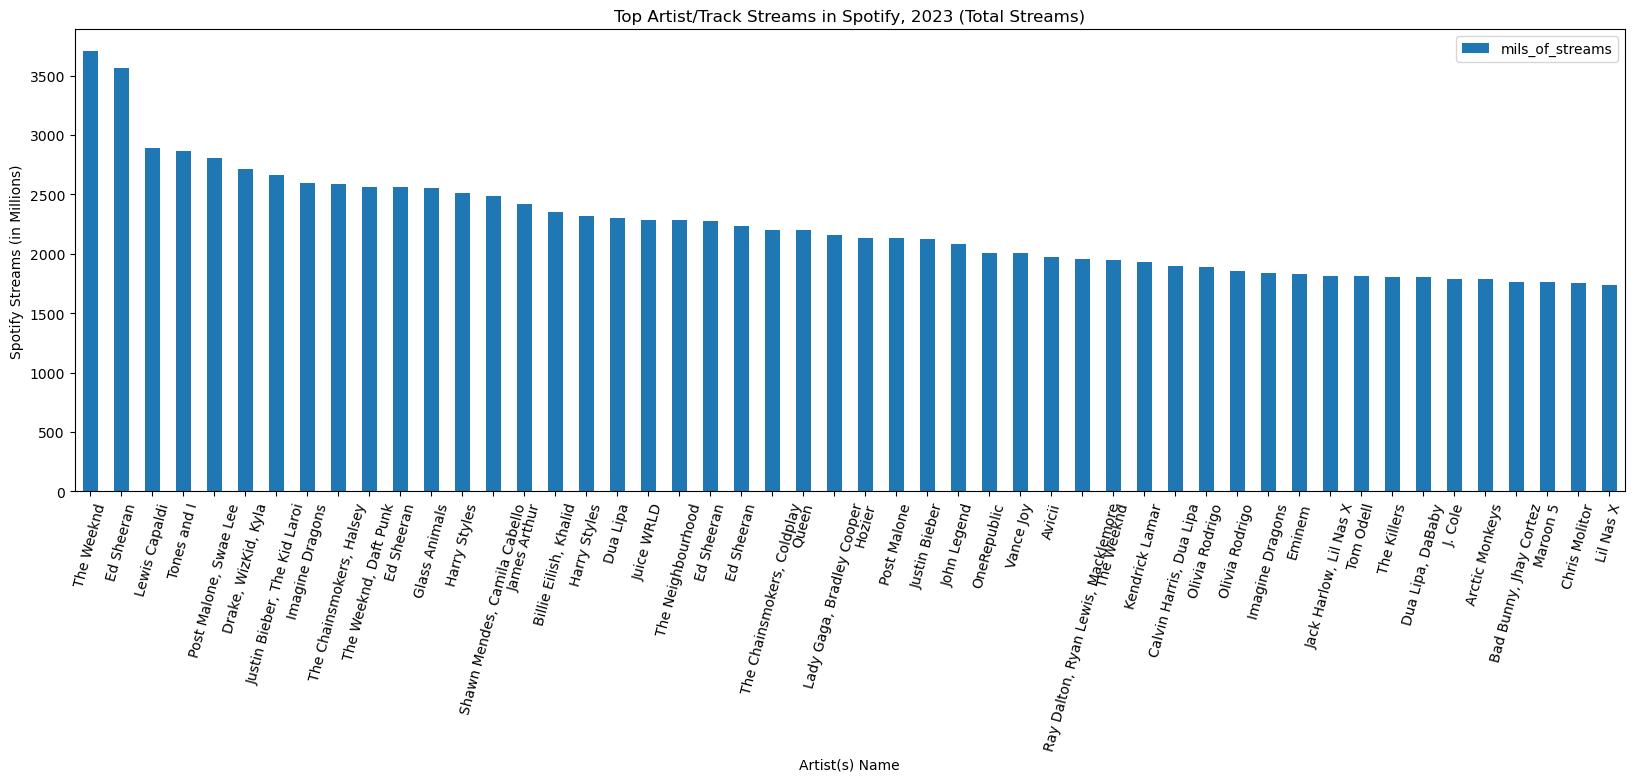

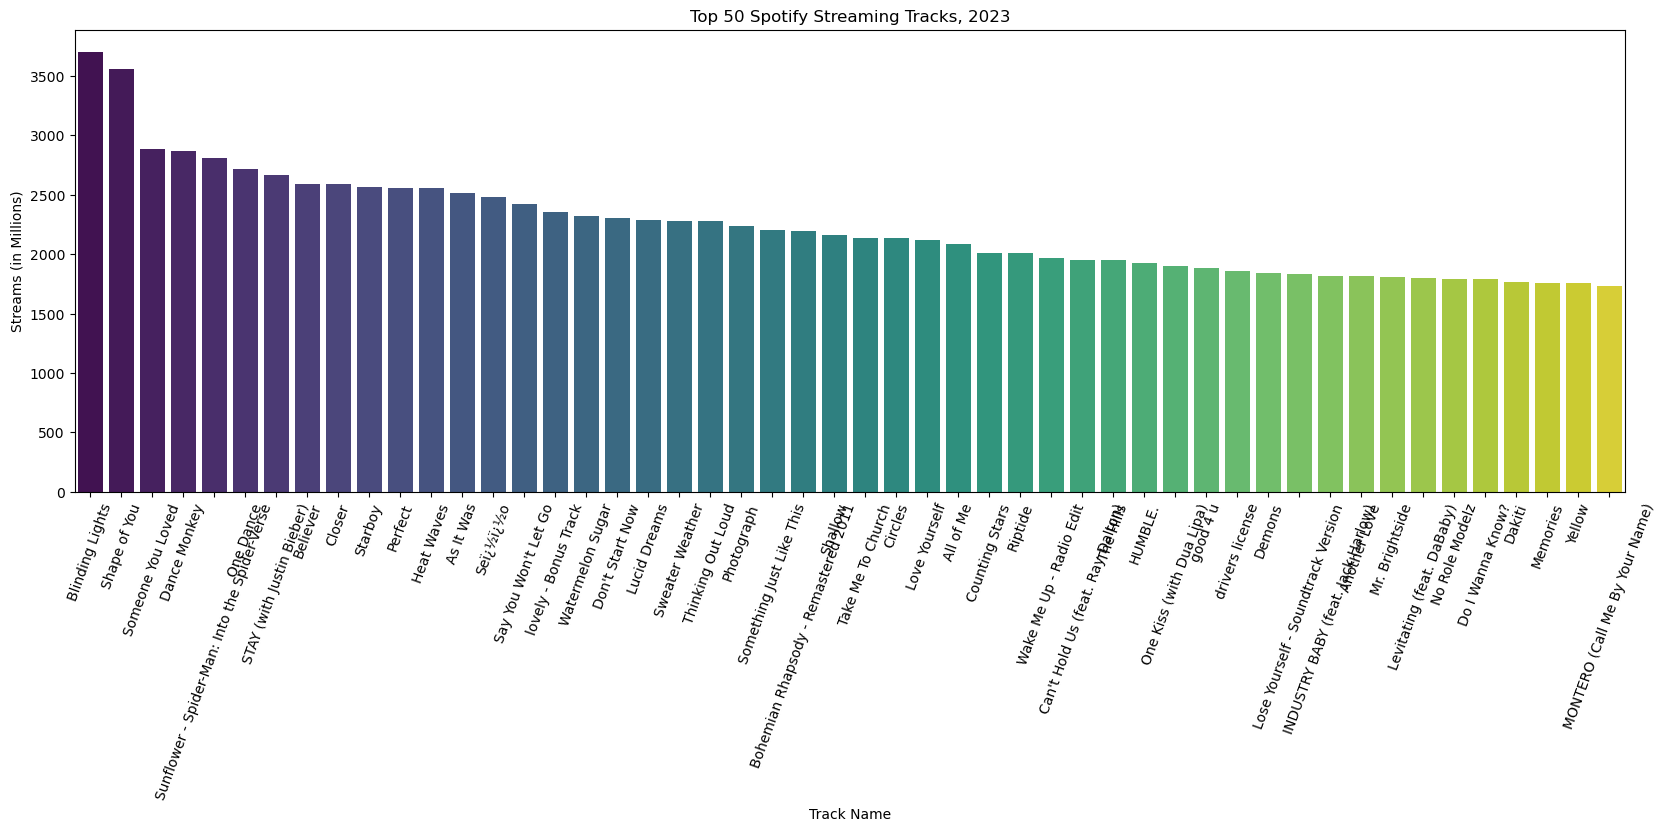

,artist(s)_name,track_name,in_spotify_playlists
0,"Pharrell Williams, Nile Rodgers, Daft Punk",Get Lucky - Radio Edit,52898
1,The Killers,Mr. Brightside,51979
2,Avicii,Wake Me Up - Radio Edit,50887
3,Nirvana,Smells Like Teen Spirit - Remastered 2021,49991
4,a-ha,Take On Me,44927
5,The Weeknd,Blinding Lights,43899
6,"Drake, WizKid, Kyla",One Dance,43257
7,"Gotye, Kimbra",Somebody That I Used To Know,42798
8,Tears For Fears,Everybody Wants To Rule The World,41751
9,Guns N' Roses,Sweet Child O' Mine,41231


<Axes: title={'center': 'Top Artists in Spotify Playlists (2023)'}, xlabel='Artist(s) Name', ylabel='in Spotify Playlists'>

,artist(s)_name,track_name,mils_of_streams,in_spotify_playlists,in_spotify_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141.3817,553,147
1,Harry Styles,As It Was,2513.1885,23575,130
2,Miley Cyrus,Flowers,1316.8557,12211,115
3,Olivia Rodrigo,vampire,140.0040,1397,113
4,Arctic Monkeys,I Wanna Be Yours,1297.0262,12859,110


<Axes: title={'center': 'Top Artists in Spotify Charts (2023)'}, xlabel='Artist(s) Name', ylabel='Spotify Charts'>

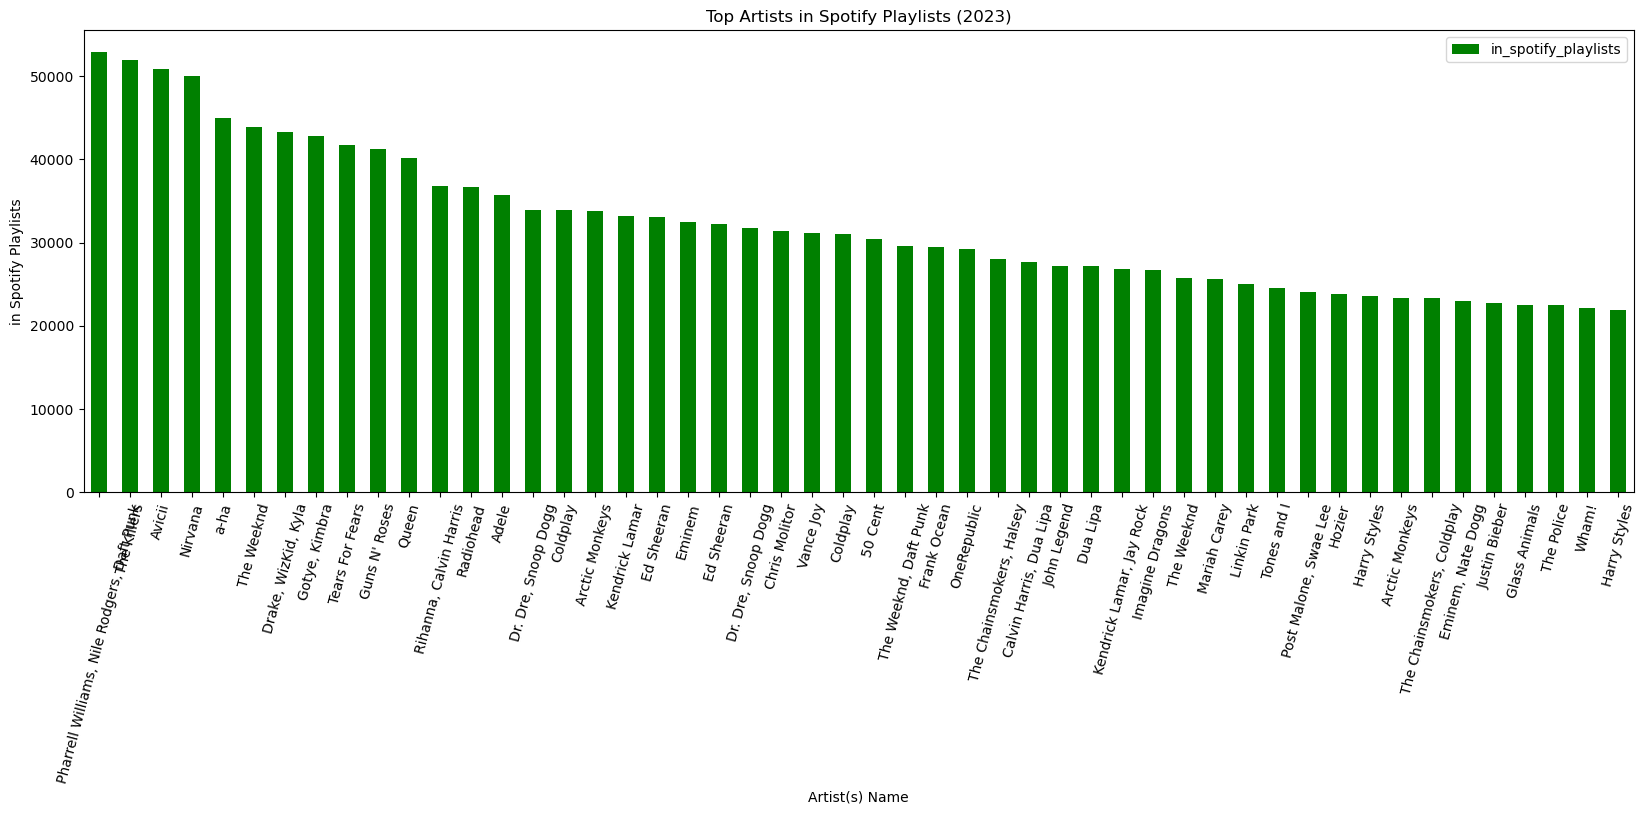

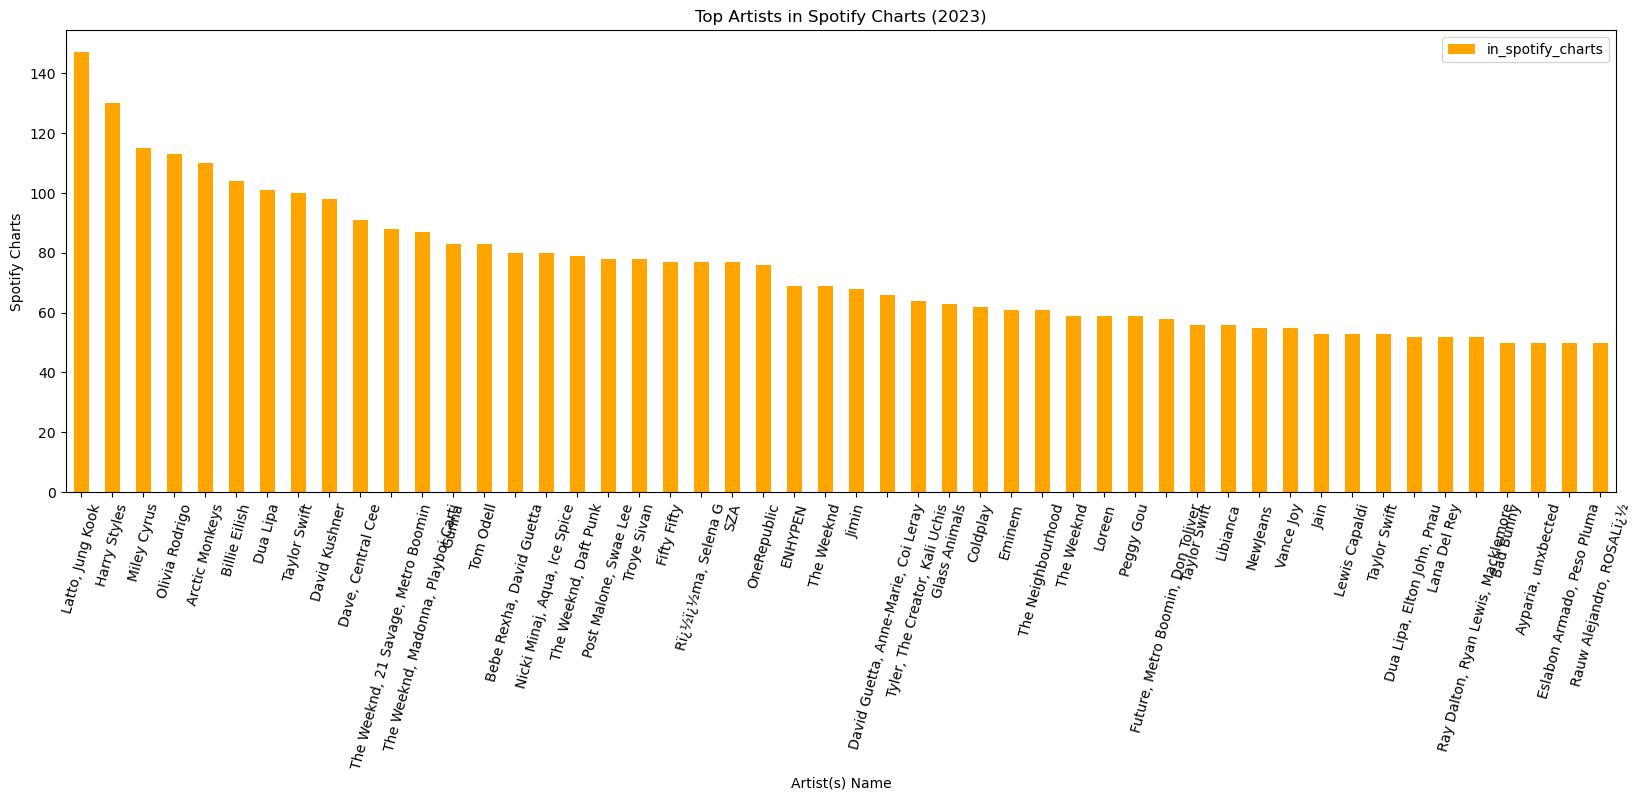

In [73]:
##########################################################
# (Will) Identify The Top Spotify Artists
##########################################################
artists_spotify = df_mils[['artist(s)_name', 'track_name', 
                    'mils_of_streams', 'in_spotify_playlists', 'in_spotify_charts']]

############################################################################################
# Most popular Artist/Track on Spotify, by Millions of Streams (using Pandas Dataframe plot)
############################################################################################
top_streams_df = artists_spotify.sort_values('mils_of_streams', ascending=False).head(50)
display(top_streams_df.reset_index(drop=True).head(15))

display(top_streams_df.plot(kind='bar',                 
                title = 'Top Artist/Track Streams in Spotify, 2023 (Total Streams)',
                x='artist(s)_name', y='mils_of_streams', 
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='Spotify Streams (in Millions)',
                figsize=[20,6]))


############################################################################################
# (Will) Top 50 Spotify Streaming Tracks, 2023 (using Seaborn plot)
# #########################################################
# barplot(data, x, y, hue, order, hue_order, estimator, 
#         errorbar, n_boot, units, seed, orient, color, palette, saturation, 
#         width, errcolor, errwidth, capsize, dodge, ci, ax, **kwargs)
plt.figure(figsize=(20, 6))
sb.barplot(data = top_streams_df.sort_values('mils_of_streams', ascending=False), 
           x='track_name', y='mils_of_streams', 
           palette='viridis')
plt.title('Top 50 Spotify Streaming Tracks, 2023')
plt.xlabel('Track Name')
plt.xticks(rotation=70)
plt.ylabel('Streams (in Millions)')
plt.show()

##########################################################
# Most popular Artist/Track on Spotify, by Presence in Spotify Playlists
##########################################################
top_playlist_df = artists_spotify.sort_values('in_spotify_playlists', ascending=False).head(50)
display(top_playlist_df[['artist(s)_name', 'track_name', 'in_spotify_playlists']].reset_index(drop=True).head(15))

display(top_playlist_df.plot(kind='bar', 
                title = 'Top Artists in Spotify Playlists (2023)',
                x='artist(s)_name', y='in_spotify_playlists', 
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='in Spotify Playlists',
                color = 'green', figsize=[20,6]))

##########################################################
# Plot most popular Artist/Track on Spotify, by Spotify Charts
##########################################################

top_charts_df = artists_spotify.sort_values('in_spotify_charts', ascending=False).head(50)

display(top_charts_df.reset_index(drop=True).head())
display(top_charts_df.plot(kind='bar', 
                title = 'Top Artists in Spotify Charts (2023)',
                x='artist(s)_name', y='in_spotify_charts',
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='Spotify Charts',
                color = 'orange', figsize=[20,6])
)

,mils_of_streams,in_spotify_playlists,in_spotify_charts
track_name,,,
Blinding Lights,3703.8951,43899,69
Shape of You,3562.5439,32181,10
Someone You Loved,2887.2418,17836,53
Dance Monkey,2864.7917,24529,0
Sunflower - Spider-Man: Into the Spider-Verse,2808.0966,24094,78


<Axes: title={'center': 'Top Track Streams in Spotify, 2023'}, xlabel='Track Name'>

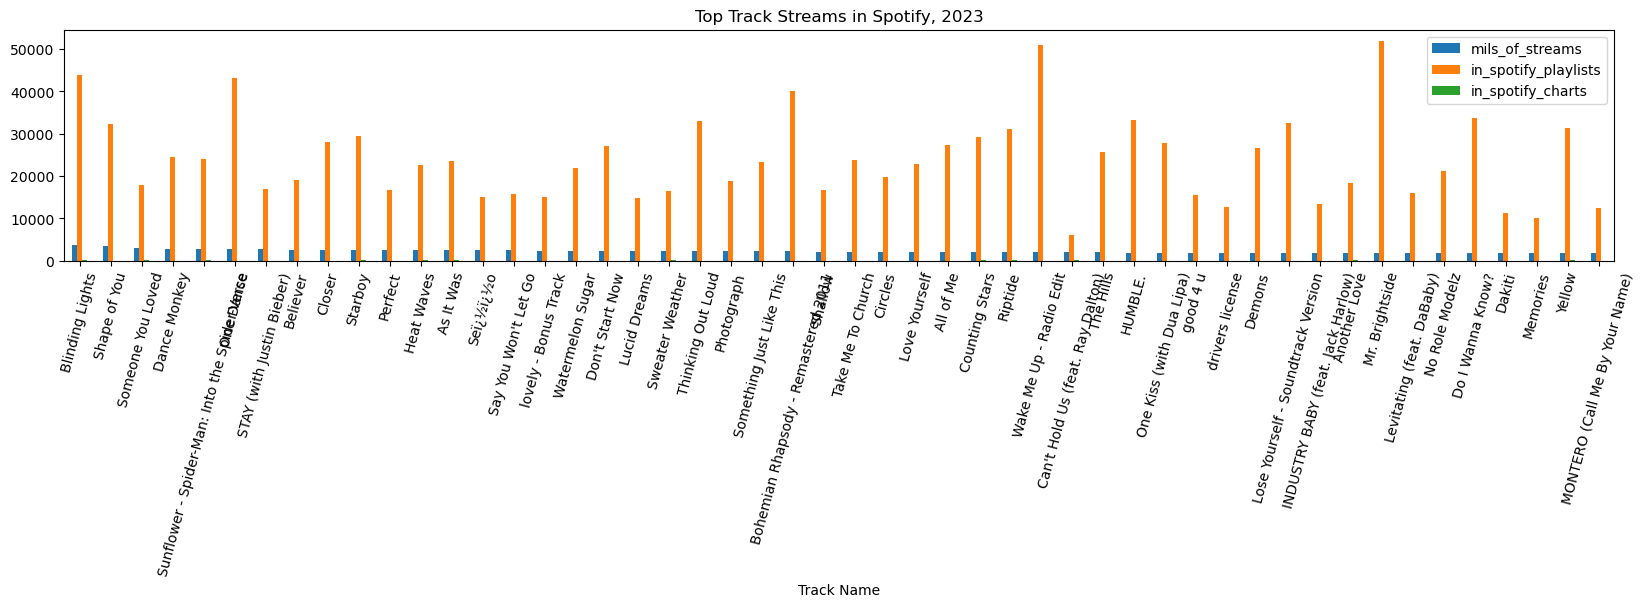

In [74]:
# MULTIPLOT for the tracks that are the top 20/50 in Streaming, including
# the number of Playlists and list the Charts

tracks_spotify_multi = df_mils[['track_name', 
                    'mils_of_streams', 'in_spotify_playlists', 'in_spotify_charts']]

top_streams_df = tracks_spotify_multi.sort_values('mils_of_streams', ascending=False).head(50)
top_streams_df.set_index(["track_name"],inplace=True)
display(top_streams_df.head())
 
# Use DataFrame.plot() in order to create a bar chart of the data
top_streams_df.plot(kind="bar", figsize=(20,3),
                 title = 'Top Track Streams in Spotify, 2023',
                 xlabel='Track Name', rot=75,      
                    )


# # Pandas can also plot multiple columns if the DataFrame includes them
# multi_plot = top_streams_df.plot(kind="bar", figsize=(20,5))

# # PandasPlot.set_xticklabels() can be used to set the tick labels as well
# multi_plot.set_xticklabels(top_streams_df["Track Name"], rotation=45)

# display(plt.show())
# plt.tight_layout()

# barplot(data, x, y, hue, order, hue_order, estimator, 
#         errorbar, n_boot, units, seed, orient, color, palette, saturation, 
#         width, errcolor, errwidth, capsize, dodge, ci, ax, **kwargs)
# sb.barplot(top_streams_df, x='track_name', y='mils_of_streams', palette='viridis')

In [75]:
df_mils.columns

Index(['release_date', 'track_name', 'artist(s)_name', 'artist_count',
       'in_spotify_playlists', 'in_spotify_charts', 'mils_of_streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### NEW DF:  spotify_tracks_date_df

In [100]:
display(f'df_mils cols: {df_mils.columns}')

spotify_tracks_date_df = df_mils[['artist(s)_name', 'track_name', 'release_date',
                     'mils_of_streams', 'in_spotify_playlists']]  # 'in_spotify_charts'


spotify_tracks_date_df['release_year'] = spotify_tracks_date_df['release_date'].dt.year


display(spotify_tracks_date_df.head())

"df_mils cols: Index(['release_date', 'track_name', 'artist(s)_name', 'artist_count',\n       'in_spotify_playlists', 'in_spotify_charts', 'mils_of_streams',\n       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',\n       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',\n       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',\n       'instrumentalness_%', 'liveness_%', 'speechiness_%'],\n      dtype='object')"

C:\Users\black\AppData\Local\Temp\ipykernel_33216\2346386812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_tracks_date_df['release_year'] = spotify_tracks_date_df['release_date'].dt.year


,artist(s)_name,track_name,release_date,mils_of_streams,in_spotify_playlists,release_year
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2023-07-14,141.3817,553,2023
1,Myke Towers,LALA,2023-03-23,133.7163,1474,2023
2,Olivia Rodrigo,vampire,2023-06-30,140.0040,1397,2023
3,Taylor Swift,Cruel Summer,2019-08-23,800.8408,7858,2019
4,Bad Bunny,WHERE SHE GOES,2023-05-18,303.2363,3133,2023


### new df; top_streams_rel_yr_df

In [101]:
# Sort by the total streams and get the top 50

top_streams_rel_yr_df  = spotify_tracks_date_df[['track_name', 'release_year', 'mils_of_streams']]
top_streams_rel_yr_df = top_streams_rel_yr_df.sort_values('mils_of_streams', ascending=False).head(50)
top_streams_rel_yr_df.reset_index(inplace=True, drop=True)

display(top_streams_rel_yr_df.head())
display(top_streams_rel_yr_df.columns)

,track_name,release_year,mils_of_streams
0,Blinding Lights,2019,3703.8951
1,Shape of You,2017,3562.5439
2,Someone You Loved,2018,2887.2418
3,Dance Monkey,2019,2864.7917
4,Sunflower - Spider-Man: Into the Spider-Verse,2018,2808.0966


Index(['track_name', 'release_year', 'mils_of_streams'], dtype='object')

##########################################################
###  (Will) Investigate the year(s) of Release of the top Streamed Tracks in Spotify
###         Investigate the year(s) of Release of the top Tracks Added to Playlists
##########################################################
  The artist/tracks that appeared in the most playlists were different than 
    those with the most streams.  
  Qualitative analysis shows that the songs most added to playlists were older than current values.
  Plot the top most Streamed Tracks and show the Year They were Released.

Text(0, 0.5, 'Year Released')

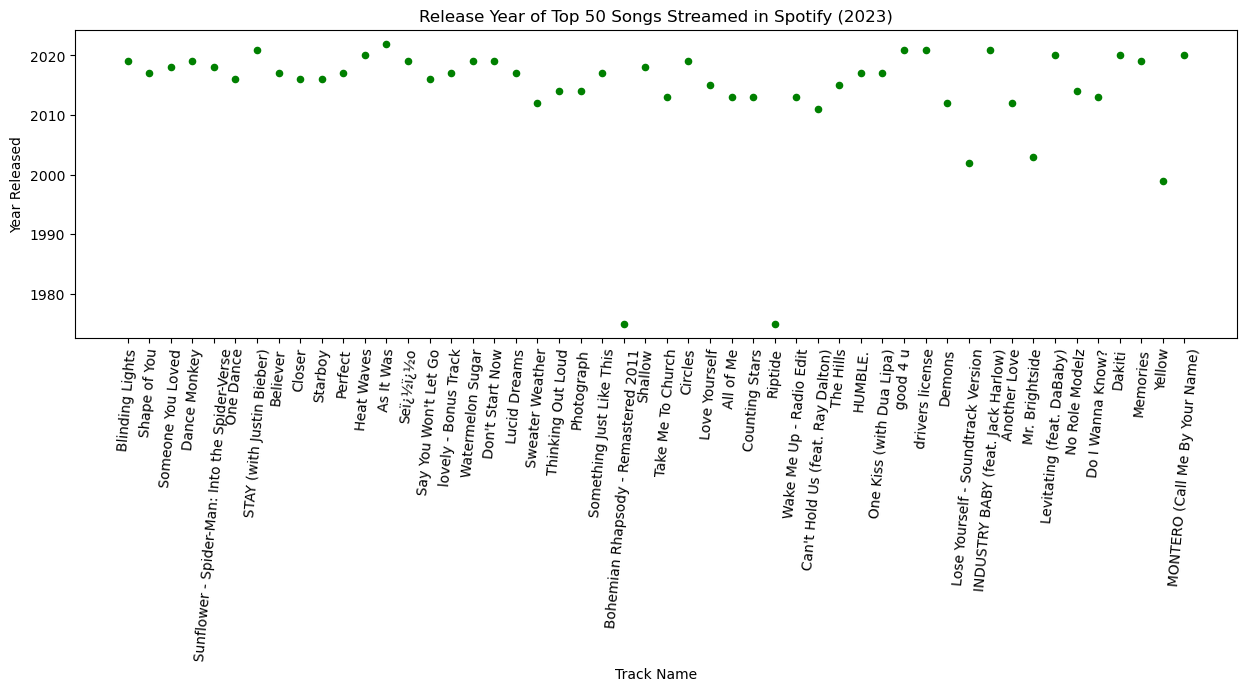

In [105]:
# Display the most streamed tracks and their release year (top 50 songs streamed:)
# Plot the scatter plot with 'track_name' and 'release_year'
top_streams_rel_yr_df.plot(kind='scatter', 
                                  title='Release Year of Top 50 Songs Streamed in Spotify (2023)',
                                  x='track_name', y='release_year', rot=85,
                                  color='green', figsize=[15, 4])

# Set axis labels
plt.xlabel('Track Name')
plt.ylabel('Year Released')

### new df; top_playlist_rel_yr_df

In [102]:
# Sort by the total streams and get the top 50

top_playlist_rel_yr_df  = spotify_tracks_date_df[['track_name', 'release_year', 'in_spotify_playlists']]
top_playlist_rel_yr_df = top_playlist_rel_yr_df.sort_values('in_spotify_playlists', ascending=False).head(50)
top_playlist_rel_yr_df.reset_index(inplace=True, drop=True)

display(top_playlist_rel_yr_df.head())
display(top_playlist_rel_yr_df.columns)

,track_name,release_year,in_spotify_playlists
0,Get Lucky - Radio Edit,2013,52898
1,Mr. Brightside,2003,51979
2,Wake Me Up - Radio Edit,2013,50887
3,Smells Like Teen Spirit - Remastered 2021,1991,49991
4,Take On Me,1984,44927


Index(['track_name', 'release_year', 'in_spotify_playlists'], dtype='object')

Text(0, 0.5, 'Year Released')

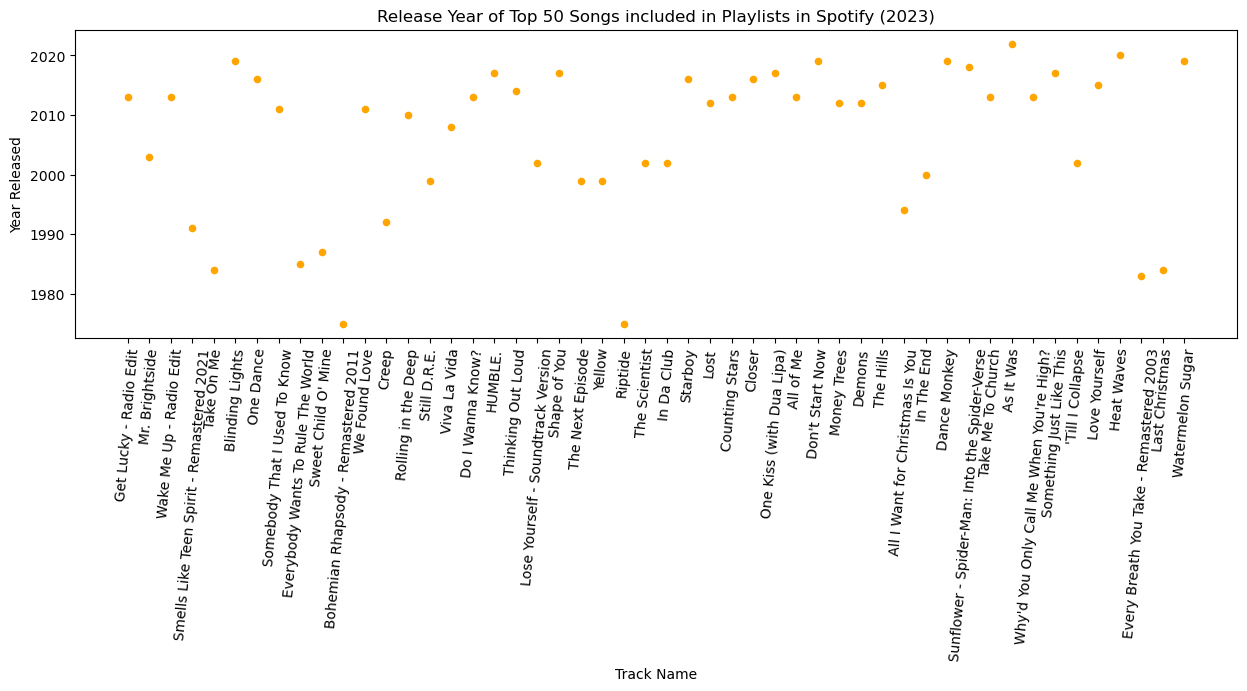

In [104]:
# for the top 50 songs included in playlists:
# Plot the scatter plot with 'track_name' and 'release_year'
top_playlist_rel_yr_df.plot(kind='scatter', 
                                  title='Release Year of Top 50 Songs included in Playlists in Spotify (2023)',
                                  x='track_name', y='release_year', rot=85,
                                  color='orange', figsize=[15, 4])

# Set axis labels
plt.xlabel('Track Name')
plt.ylabel('Year Released')

In [106]:
# # Top 50 Tracks by total playlists

# ### new df; top_streams_rel_yr_df


# top_playlist_rel_yr_df = spotify_tracks_date_df.sort_values('in_spotify_playlists', ascending=False).head(50)
# display(f'top_playlist_dates_df cols: {top_playlist_dates_df.columns}')

# # For the top tracks in Playlists, what year were they released?
# #  Plot the top Tracks in Playlists and show the Year They were Released.
# display(f'top_playlist_dates_df cols: {top_playlist_dates_df.columns}')
# display(top_playlist_dates_df[['track_name', 'release_date', 'in_spotify_playlists']].reset_index(drop=True).head(10))


# display(top_playlist_dates_df.plot(kind='scatter', 
#                 title = 'Release Year of Tops Songs in Spotify Playlists (2023)',
#                 x='track_name', y='release_date', 
#                 xlabel='Song', rot=75, # horizontalalignment="center",
#                 ylabel='Year Released',
#                 color = 'orange', figsize=[10,6]))


,artist(s)_name,track_name,release_date,mils_of_streams,in_spotify_playlists,decade
80,Vance Joy,Riptide,1975-01-01,2009.0947,31123,1970-1980
717,Queen,Bohemian Rhapsody - Remastered 2011,1975-10-31,2197.0107,40112,1970-1980
166,The Police,Every Breath You Take - Remastered 2003,1983-01-06,1593.2707,22439,1980-1990
442,Wham!,Last Christmas,1984-01-01,1159.1761,22153,1980-1990
199,a-ha,Take On Me,1984-10-19,1479.1151,44927,1980-1990


decade
2010-2020    28
1990-2000     7
2000-2010     7
1980-1990     5
1970-1980     2
2020-2024     1
Name: count, dtype: int64

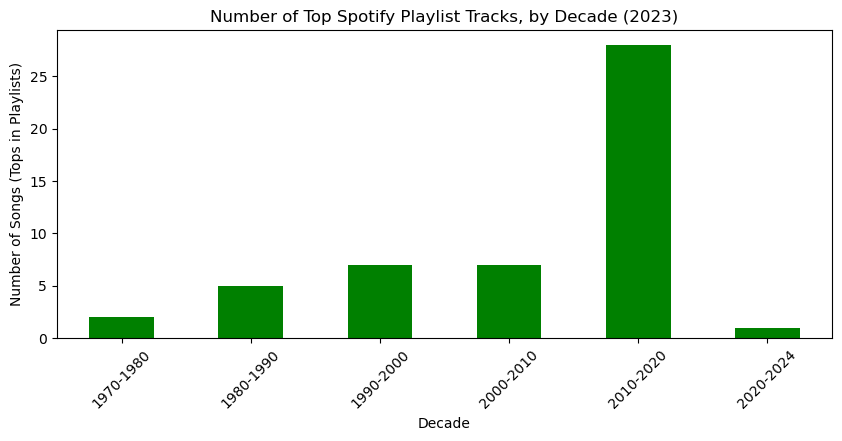

decade
1970-1980     71235
1980-1990    172501
1990-2000    234519
2000-2010    238405
2010-2020    866720
2020-2024     23575
Name: in_spotify_playlists, dtype: int64

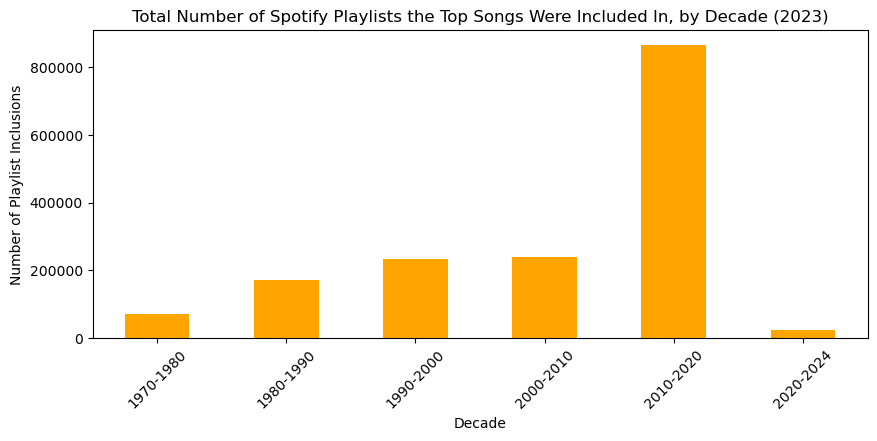

In [107]:
# For the top 50 tracks in Playlists, group by the decade they were released.

##############################################################
# Top 50 Tracks by total playlists, sorted by release date
top_playlists_df = spotify_tracks_date.sort_values('in_spotify_playlists', ascending=False).head(50)
top_playlists_df = top_playlists_df.sort_values(by=['release_date'])

# Bin the years of the release dates of the Top Playlisted Tracks
bins = [1970, 1980, 1990, 2000, 2010, 2020, 2024]
decades = ['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2024']
top_playlists_df['decade'] = pd.cut(top_playlists_df['release_date'].dt.year, bins, labels=decades, include_lowest=True)
display(top_playlists_df.head())


# For the top tracks in Playlists, show the decade they were released.
#   1) value_counts gives total instances of tracks from each of the decades that are tops in playlist inclusion
tracks = top_playlists_df['decade'].value_counts()  
display(tracks)
tracks.sort_index().plot(kind='bar', 
                title = 'Number of Top Spotify Playlist Tracks, by Decade (2023)',
                x= tracks.index, y=tracks.values, 
                xlabel='Decade', rot=45, # horizontalalignment="center",
                ylabel='Number of Songs (Tops in Playlists)',
                color = 'green', figsize=[10,4])
plt.show()

#   2) Summing all of the playlists that each of the Top Tracks were put into gives total 
#        number of playlists these top tracks were included in, by decade
playlists = top_playlists_df.groupby('decade')['in_spotify_playlists'].sum()
display(playlists)

playlists.sort_index().plot(kind='bar', 
                title = 'Total Number of Spotify Playlists the Top Songs Were Included In, by Decade (2023)',
                x= playlists.index, y=playlists.values, 
                xlabel='Decade', rot=45, # horizontalalignment="center",
                ylabel='Number of Playlist Inclusions',
                color = 'orange', figsize=[10,4])

plt.show()

,artist(s)_name,track_name,release_date,mils_of_streams,in_spotify_playlists,decade
80,Vance Joy,Riptide,1975-01-01,2009.0947,31123,1970-1980
717,Queen,Bohemian Rhapsody - Remastered 2011,1975-10-31,2197.0107,40112,1970-1980
65,Chris Molitor,Yellow,1999-01-01,1755.2144,31358,1990-2000
296,Eminem,Lose Yourself - Soundtrack Version,2002-01-01,1829.9930,32502,2000-2010
630,The Killers,Mr. Brightside,2003-09-23,1806.6177,51979,2000-2010


decade
2010-2020    40
2020-2024     5
1970-1980     2
2000-2010     2
1990-2000     1
1980-1990     0
Name: count, dtype: int64

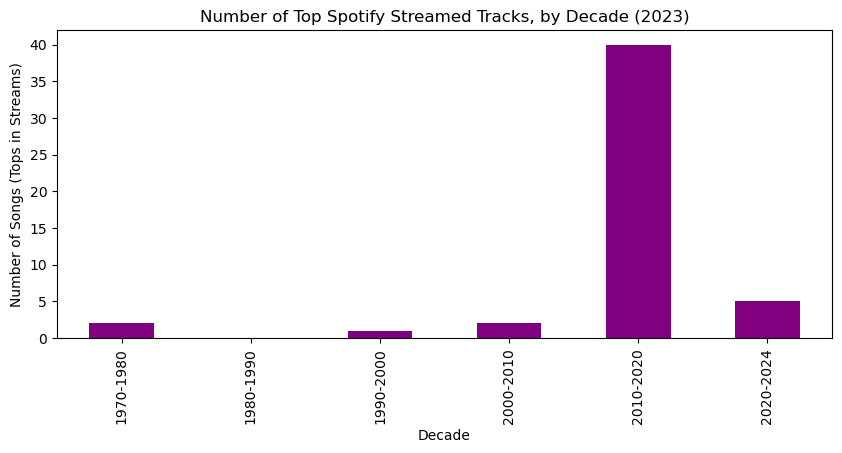

decade
1970-1980     4206.1054
1980-1990        0.0000
1990-2000     1755.2144
2000-2010     3636.6107
2010-2020    91229.0391
2020-2024    10738.0660
Name: mils_of_streams, dtype: float64

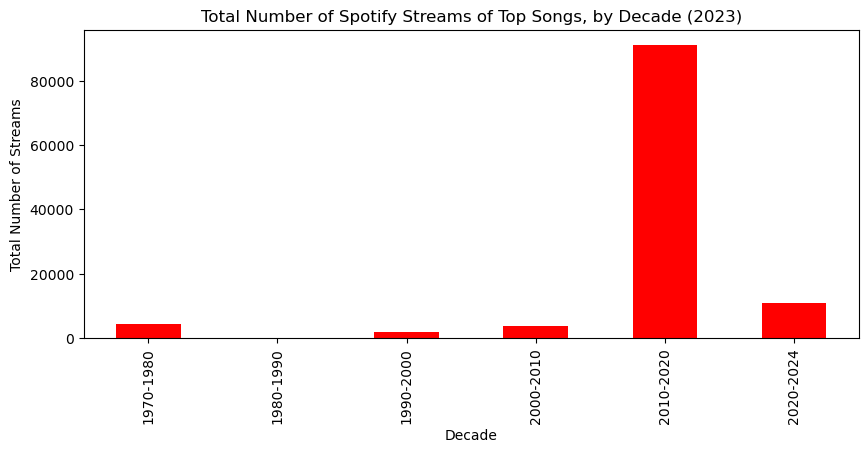

In [108]:
# For the top tracks by total streams, group by the decade they were released.

##############################################################
# Top 50 Tracks by total Streams
top_streams_dates_df = spotify_tracks_date.sort_values('mils_of_streams', ascending=False).head(50)

# Top 50 Tracks by total streams, sorted by release date
top_streams_df = top_streams_dates_df.sort_values(by=['release_date'])

# # Bin the years of the release dates of the Top Streamed Tracks
bins = [1970, 1980, 1990, 2000, 2010, 2020, 2024]
decades = ['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2024']

# Create new decade column for grouping later into Decades
top_streams_df['decade'] = pd.cut(top_streams_df['release_date'].dt.year, bins, labels=decades, include_lowest=True)
display(top_streams_df.head())


# For the top tracks in Playlists, show the decade they were released.
#   1) value_counts gives total instances of tracks from each of the decades that are tops in playlist inclusion
streams = top_streams_df['decade'].value_counts()  
display(streams)
streams.sort_index().plot(kind='bar', 
                title = 'Number of Top Spotify Streamed Tracks, by Decade (2023)',
                x= streams.index, y=streams.values, 
                xlabel='Decade',
                ylabel='Number of Songs (Tops in Streams)',
                color = 'purple', figsize=[10,4])
plt.show()

#   2) Summing all of the playlists that each of the Top Tracks were put into gives total 
#        number of playlists these top tracks were included in, by decade
streams_sum = top_streams_df.groupby('decade')['mils_of_streams'].sum()
display(streams_sum)

streams_sum.sort_index().plot(kind='bar', 
                title = 'Total Number of Spotify Streams of Top Songs, by Decade (2023)',
                x= streams_sum.index, y=streams_sum.values, 
                xlabel='Decade',
                ylabel='Total Number of Streams',
                color = 'red', figsize=[10,4])

plt.show()


In [83]:
#  Combine playlist dataframes  tracks, playlists
tracks1 = tracks.reset_index()
playlists1 = playlists.reset_index()

playlists_df = tracks1.merge(playlists1, on='decade').sort_values(by=['decade'])
playlists_df = playlists_df.rename(columns={"count": "# Tracks included Spotify Playlists",
                                        "in_spotify_playlists": "Playlist Inclusions",
                                      })                                

#  Combine stream dataframes
streams1 = streams.reset_index()
streams_sum1 = streams_sum.reset_index()

streams_df = streams1.merge(streams_sum1, on='decade').sort_values(by=['decade'])
streams_df = streams_df.rename(columns={"count": "# Tracks Streamed",
                                        "mils_of_streams": "Streams (Millions)",
                                })                                

spotify_decade_df = playlists_df.merge(streams_df, on='decade').sort_values(by=['decade'])
display(spotify_decade_df)

,decade,# Tracks included Spotify Playlists,Playlist Inclusions,# Tracks Streamed,Streams (Millions)
0,1970-1980,2,71235,2,4206.1054
1,1980-1990,5,172501,0,0.0000
2,1990-2000,7,234519,1,1755.2144
3,2000-2010,7,238405,2,3636.6107
4,2010-2020,28,866720,40,91229.0391
5,2020-2024,1,23575,5,10738.0660


Index(['# Tracks included Spotify Playlists', 'Playlist Inclusions',
       '# Tracks Streamed', 'Streams (Millions)', 'Streams (x100,000)'],
      dtype='object')

,# Tracks included Spotify Playlists,Playlist Inclusions,# Tracks Streamed,Streams (Millions),"Streams (x100,000)"
decade,,,,,
1970-1980,2,71235,2,4206.1054,42061.054
1980-1990,5,172501,0,0.0000,0.000
1990-2000,7,234519,1,1755.2144,17552.144
2000-2010,7,238405,2,3636.6107,36366.107
2010-2020,28,866720,40,91229.0391,912290.391
2020-2024,1,23575,5,10738.0660,107380.660


<Axes: title={'center': 'Top Tracks in Spotify, 2023'}, xlabel='Decade'>

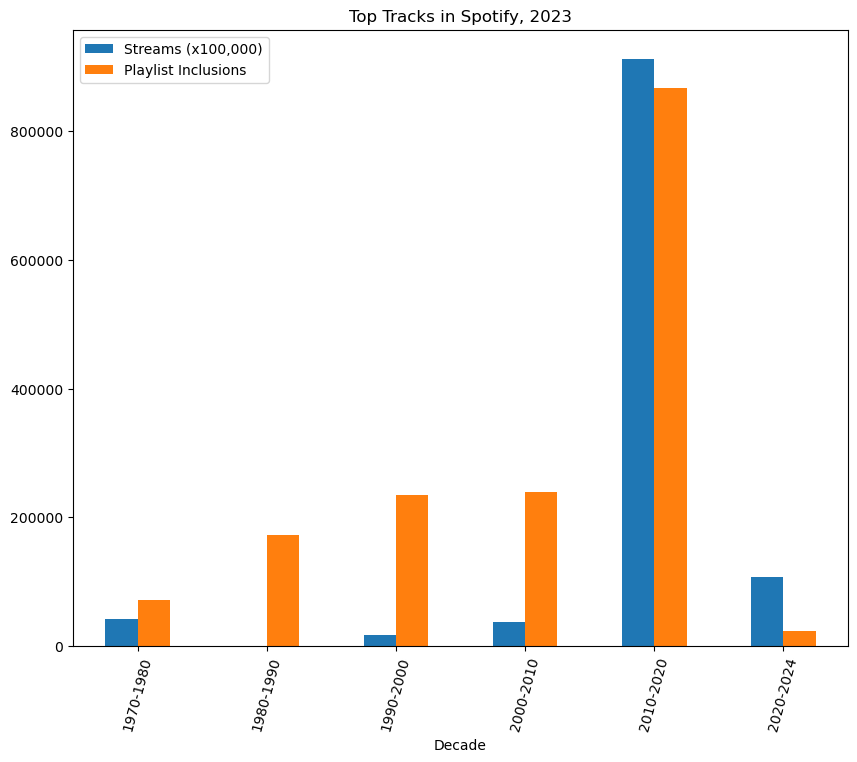

In [84]:
# Combine total tracks by Decade for Streamed vs. Playlists into a Multiplot
spotify_decade_multi_df = spotify_decade_df.set_index('decade')


# rescale Streams/ Playlists to fit on same chart
spotify_decade_multi_df['Streams (x100,000)'] = spotify_decade_multi_df['Streams (Millions)'].apply(lambda x: round(x*10, 4))
# spotify_decade_multi_df['Playlist Inclusions (x10)'] = spotify_decade_multi_df['Playlist Inclusions'].apply(lambda x: round(x/10, 4))
display(spotify_decade_multi_df.columns)
display(spotify_decade_multi_df)


# Use DataFrame.plot() in order to create a bar chart of the data
spotify_decade_multi_df[['Streams (x100,000)','Playlist Inclusions']].plot(kind="bar", figsize=(10,8),
                 title = 'Top Tracks in Spotify, 2023',
                 xlabel='Decade', rot=75,      
                    )

key
A       75
A#      57
B       81
C#     120
D       81
D#      33
E       62
F       89
F#      73
G       96
G#      91
Name: count, dtype: int64

<Axes: title={'center': 'Keys of Top Songs Streamed in Spotify (2023)'}, xlabel='Key', ylabel='Number of Songs'>

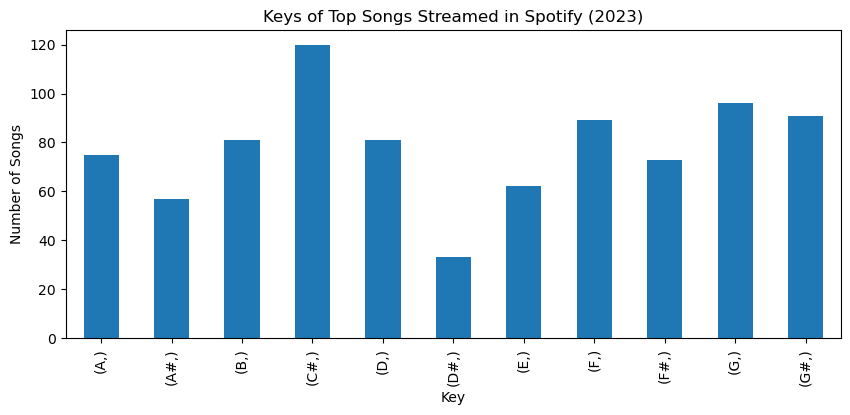

In [85]:
##########################################################
# (Will) Identify the Keys of the most streamed Tracks
##########################################################


# # Most Common Keys of the Top Tracks in Spotify 2023 data
key_counts = df_mils[['key']].value_counts() 
key_counts = key_counts.sort_index()
display(key_counts)

display(key_counts.plot(kind='bar', 
                title = 'Keys of Top Songs Streamed in Spotify (2023)',
                x= key_counts.index, y=key_counts.values, 
                xlabel='Key',
                ylabel='Number of Songs',
                figsize=[10,4]))

artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: Int64

C:\Users\black\AppData\Local\Temp\ipykernel_33216\1889533160.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')


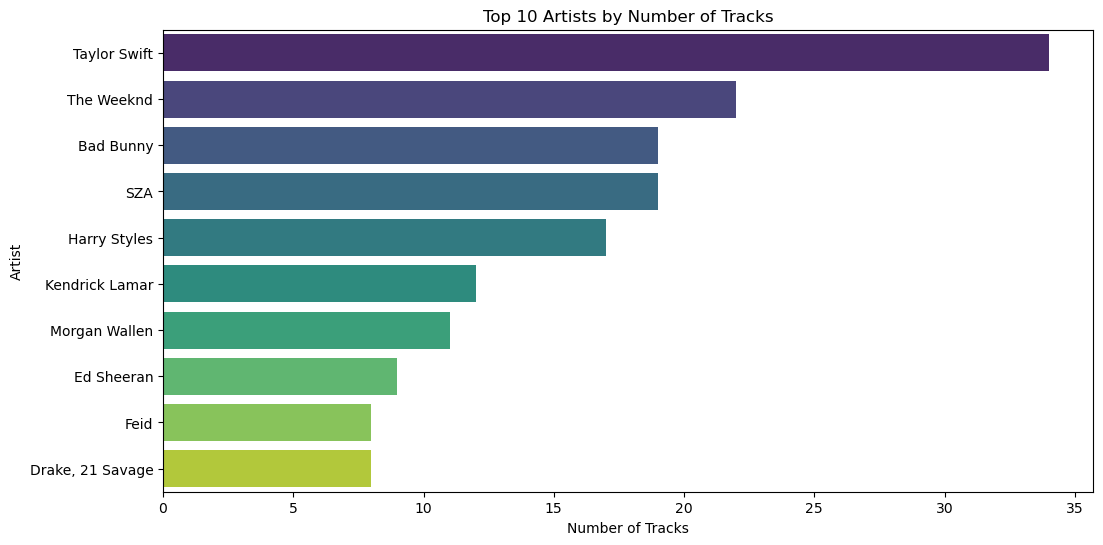

In [86]:
##########################################################
# (Shubhda) Visualization 1: Bar Plot - Number of tracks by artist
###########################################################

plt.figure(figsize=(12, 6))
artist_counts = df_mils['artist(s)_name'].value_counts().head(10)  # Top 10 artists
display(artist_counts)
sb.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [87]:

# Edward binning example
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seasons = ["Aquarius Season", "Valentine", "Spring", "Easter", "Memorial Day", "Summer Yay", "Summer woohoo", "Summer Awwww", "Halloween", "Thanksgiving", "Christmas"]
clean_filtered_df = df_clean[['release_date'
                    , 'streams'
                    , 'in_spotify_playlists'
                    , 'in_spotify_charts'
                    , 'in_apple_playlists'
                    , 'in_apple_charts'
                    , 'in_deezer_playlists'
                    , 'in_deezer_charts'
                    , 'in_shazam_charts']]\
            .loc[df_clean['release_date'].dt.year == 2023]
sorted_clean_filtered_df = clean_filtered_df.sort_values(by=['release_date'])
sorted_clean_filtered_df["Seasons"] = pd.cut(sorted_clean_filtered_df["release_date"].dt.month, bins, labels=seasons, include_lowest=True)
columns = ['release_date']
sorted_clean_filtered_df.drop(columns, inplace=True, axis=1)
df_seasons = sorted_clean_filtered_df.groupby(['Seasons']).mean()
df_seasons

,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
Seasons,,,,,,,,
Aquarius Season,2.567257e+08,1797.714286,21.238095,47.333333,63.166667,64.880952,5.357143,111.317073
Valentine,1.700923e+08,1269.108108,18.837838,31.081081,60.702703,36.027027,2.864865,120.378378
Spring,1.508054e+08,1216.095238,20.095238,30.904762,70.238095,39.809524,3.619048,122.900000
Easter,9.442075e+07,784.068966,21.172414,22.068966,61.482759,30.172414,3.931034,113.896552
Memorial Day,7.020025e+07,686.062500,28.625000,23.031250,75.593750,29.656250,5.093750,138.466667
Summer Yay,4.150467e+07,418.785714,48.214286,35.428571,116.214286,28.928571,5.071429,163.846154
Summer woohoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summer Awwww,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Halloween,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
